## Estudo para desenvolver minhas habilidades de Data Science
Name: joao Fillipi dos Santos Nascimento

<a href="https://github.com/linkinn">GitHub</a>

<a href="https://www.facebook.com/flp.linkinn">Facebook</a>

<a href="https://www.linkedin.com/in/fillipi-nascimento-35128070/">Linkedin</a>

## Introdução sobre o Transporte Aereo
O Transporte Aéreo é uma modalidade de transporte realizado pelo ar, através de veículos como os aviões, helicópteros, balões, dirigíveis, teleféricos, dentre outros. Esse tipo de transporte é utilizado para transportar cargas e pessoas, sendo considerado um dos transportes mais seguros. Seu uso foi intensificado após a Segunda Guerra Mundial (1939-1945), e atualmente é um dos transportes mais utilizados no mundo.

A invenção da aeronave no início do século XX, foi atribuída ao brasileiro Santos Dumont, o “Pai da Aviação”, e, desde então, os transportes aéreos se desenvolveram no mundo exponencialmente, o qual permitiu diminuir a distância espaço-tempo de modo rápido, seguro e cômodo.

Para saber mais sobre o inventor, acesse o link: Alberto Santos Dumont

## Sobre esta Analise
Nesta apresentação, eu estarei utilizando dados abertos disponibilizados pela CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos. Tais arquivos conterão informações sobre ocorrências envolvendo aeronaves nos últimos anos. Você pode acessar dados mais atualizados visitando a página oficial de Dados Abertos Brasileiros, mas, caso deseje, poderá estar realizando o download dos datasets utilizados aqui através dos links de download abaixo. 

Para este estudo, utilizarei de dois datasets da CENIPA: 

<a href="./dataset/ocorrencia.csv">Ocorrencia.csv</a>: possui os dados sobre cada ocorrência registrada nos últimos 10 anos. Código da ocorrência, Data, Motivo da Ocorrência e Localização serão encontrados nesse conjunto de dados. 

<a href="./dataset/aeronave.csv">Aeronave.csv</a>: informações agrupadas sobre as aeronaves envolvidas nas ocorrências registradas no arquivo ocorrencia.csv. Aqui serão encontrados dados como: Modelo da Aeronave, Tipo de Aeronave, Fabricante, Quantidade de Fatalidades, dentre outras.

### Importando Bibliotecas

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 10,\
   'axes.titlesize': 12, 'font.size': 12, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 12,\
   'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(style='darkgrid',rc=rc)

### Lendo Arquivos

In [212]:
df_aeronave = pd.read_csv('dataset/aeronave.csv')
df_ocorrencia = pd.read_csv('dataset/ocorrencia.csv')

df_aeronave.head(5)

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.00,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,nan,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.00,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,nan,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.00,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,nan,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.00,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,nan,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.00,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,nan,2016-07-30


In [213]:
df_ocorrencia.head(5)

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,nan,NaN,0,1,nan,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.00,2014-04-07,0,1,nan,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.00,2016-07-07,0,1,1.00,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.00,2012-09-20,4,1,nan,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,nan,NaN,0,1,nan,2016-07-30


### Analisando e explorando os Dados de Ocorrencias

In [215]:
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
codigo_ocorrencia           2027 non-null int64
classificacao               2027 non-null object
tipo                        2027 non-null object
localidade                  2027 non-null object
uf                          2027 non-null object
pais                        2027 non-null object
aerodromo                   2024 non-null object
dia_ocorrencia              2027 non-null object
horario                     2027 non-null object
sera_investigada            2027 non-null object
comando_investigador        2027 non-null object
status_investigacao         1821 non-null object
numero_relatorio            1821 non-null object
relatorio_publicado         995 non-null float64
dia_publicacao              995 non-null object
quantidade_recomendacoes    2027 non-null int64
aeronaves_envolvidas        2027 non-null int64
saida_pista                 256 non-null float64
dia_extracao   

In [217]:
df_ocorrencia.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'dia_extracao'],
      dtype='object')

In [218]:
#Retirando colunas que não serão usadas
df_ocorrencia.drop(['localidade', 'aerodromo', 'horario', 'sera_investigada',
       'comando_investigador', 'numero_relatorio', 'relatorio_publicado', 
       'dia_publicacao', 'quantidade_recomendacoes', 'aeronaves_envolvidas', 
       'saida_pista', 'dia_extracao'], axis = 1, inplace = True)

In [219]:
df_ocorrencia.head(5)

,codigo_ocorrencia,classificacao,tipo,uf,pais,dia_ocorrencia,status_investigacao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,RO,BRASIL,2013-05-05,NaN
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,RO,BRASIL,2013-11-25,FINALIZADA
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,RO,BRASIL,2008-08-07,FINALIZADA
3,44988,ACIDENTE,POUSO LONGO,RR,BRASIL,2011-08-11,FINALIZADA
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,RS,BRASIL,2009-12-28,ATIVA


#### Classificação das ocorrencias causadas

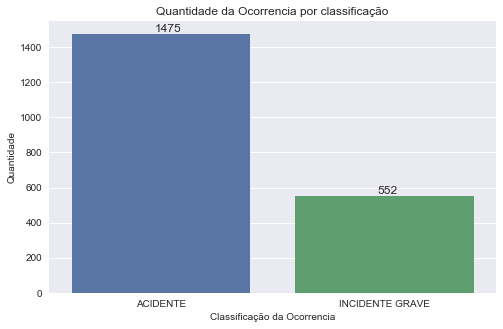

In [229]:
plt.subplots(figsize=(8,5))
c = sns.countplot(df_ocorrencia['classificacao'])
plt.title('Quantidade da Ocorrencia por classificação')
plt.xlabel('Classificação da Ocorrencia')
plt.ylabel('Quantidade')

for p in c.patches:
    b=p.get_bbox()
    c.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

Após analisar os dados podemos observar que as ocorrências estão classificadas em acidente e incidente grave, também podemos ver que nem todas as ocorrências que acontecem em transportes aéreos são consideradas como graves ou que tenham fatalidades.

#### Tipos de Ocorrencias causadas nos ultimos anos

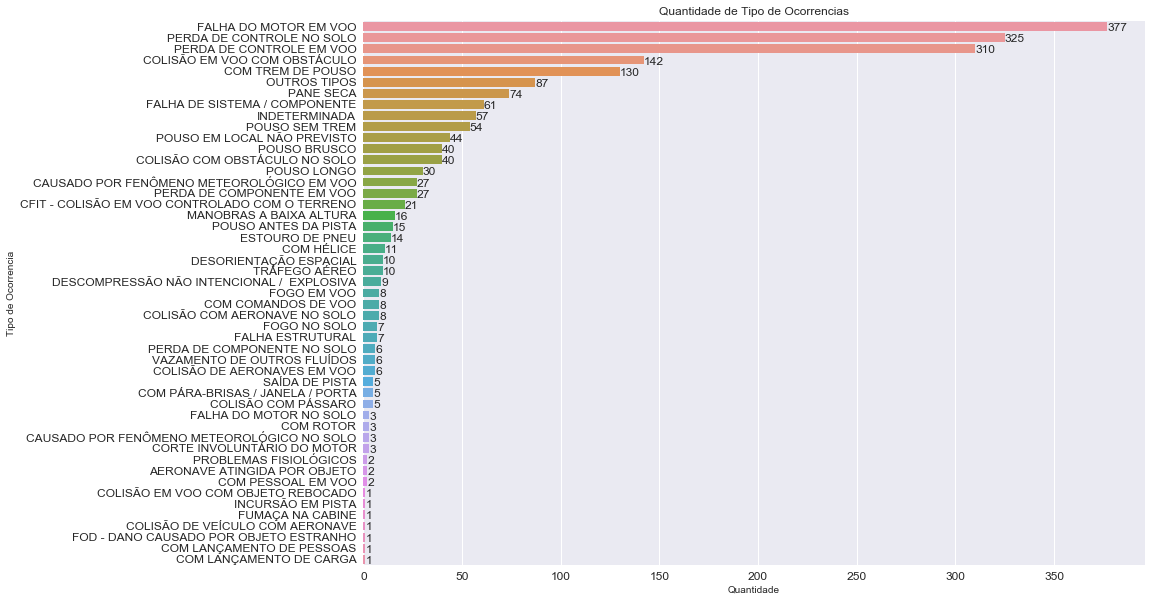

In [248]:
plt.subplots(figsize=(14,10))
t = sns.countplot(y=df_ocorrencia['tipo'], order = df_ocorrencia['tipo'].value_counts().index)
plt.title('Quantidade de Tipo de Ocorrencias')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Ocorrencia')

for p in t.patches:
    b=p.get_bbox()
    t.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1), b.y1 + 0))

No gráfico acima onde representa o tipos de falhas que causam a maioria dos acidentes podemos ver que a falha do motor em voo estar em primeiro lugar com 377 ocorrências, vindo logo em seguida a perda de controle no solo e perda de controle em voo. Podemos ver que a maioria dos acidente são causadas pelo o erro humano, porem nem sempre as causas são essas por exemplo temos uma ocorrência causada por fenômenos meteorológicos em voo.

#### Progressão desses últimos anos

Text(0,0.5,'Tipo de Ocorrencia')

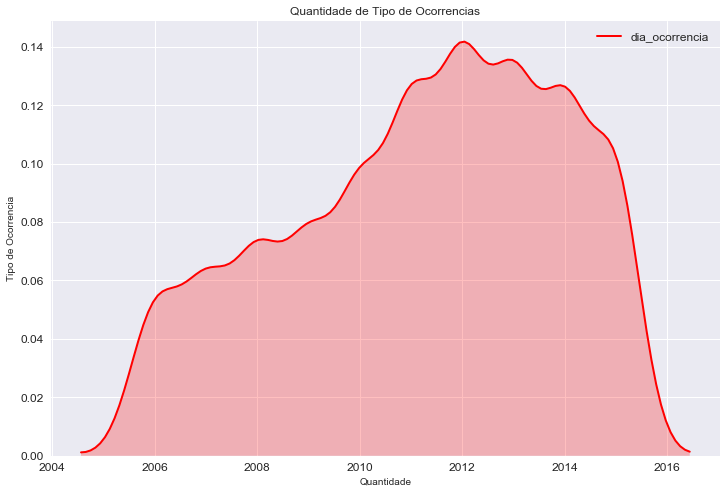

In [288]:
plt.subplots(figsize=(12,8))
sns.kdeplot(df_ocorrencia['dia_ocorrencia'].apply(lambda x: x.replace(x,x[0:4])), color="r", shade=True,  bw=.48)
plt.title('Quantidade de Tipo de Ocorrencias')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Ocorrencia')

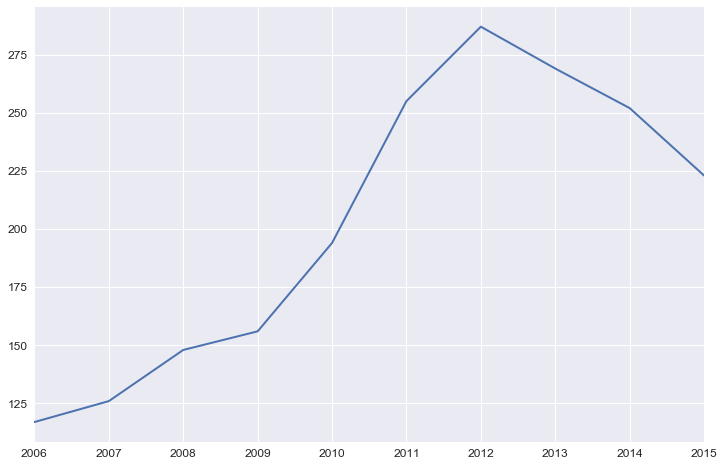

In [312]:
plot_year = df_ocorrencia.copy()
plot_year['dia_ocorrencia'] = plot_year['dia_ocorrencia'].apply(lambda x: x.replace(x,x[0:4]))
year_serie = pd.Series(plot_year['dia_ocorrencia'].value_counts().sort_index())
year_serie.plot()

As ocorrências de acidentes aéreos tem aumentado muito nos últimos anos. Enquanto em 2006 tivemos uma taxa muito baixa de menos que 125 ocorrências, em 2012 esse número subiu absurdamente para mais de 275 ocorrências. Lembrando que em 2007 pelo fato de te ocorrido menos acidentes que nos anos atuais, nesse ano tivemos um dos maiores desastres aéreo do Brasil: o acidente da TAM, que matou 194 pessoas. Mas nos anos após 2012 a taxa começou a diminuir.

#### Ocorrencias registradas por estados

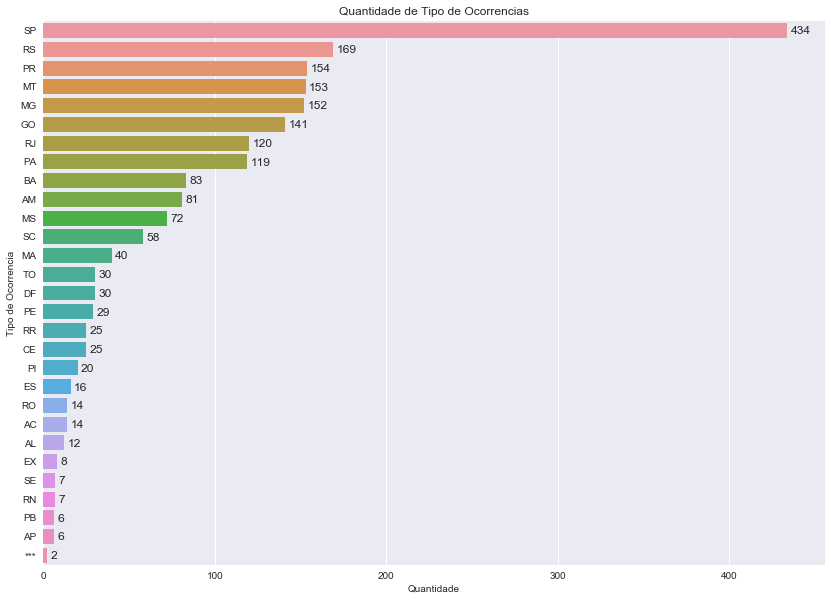

In [246]:
plt.subplots(figsize=(14,10))
uf = sns.countplot(y=df_ocorrencia['uf'], order = df_ocorrencia['uf'].value_counts().index)
plt.title('Quantidade de Tipo de Ocorrencias')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Ocorrencia')

for p in uf.patches:
    b=p.get_bbox()
    uf.annotate("{:.0f}".format(b.x1 + b.x0), ((b.x0 + b.x1) + 2, b.y1 - 0.2))

O Estado de São Paulo foi o que mais teve ocorrências de 2006 a 2015. O número e absurdamente alto, só em SP tem mais ocorrências do que vários outros estados juntos. O estado de São Paulo possui dezenas de aeroportos e os dois maiores aeroportos do Brasil quando se considera a movimentação de cargas: o Aeroporto de Cumbica(Código IATA GRU / Código ICAO SBGR), em Guarulhos, e o Aeroporto de Viracopos em Campinas (Código IATA VCP / Código ICAO SBKP), a 99 km da capital paulista.

Você deve ter percebido duas informações diferentes nesse gráfico: os "estados" \*** e EX. 

EX: Representa ocorrências registradas fora do território brasileiro, mas com aeronaves nacionais.

\***: Representam locais que não tiveram sua localização identificadas (vide tabela abaixo).
